In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [22]:
transaction_data = pd.read_csv("C://123/usr/Karpov/Data_Analytics/5/Задания/Минипроект/transaction_data.csv")
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [23]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [24]:
transaction_data['date'] = pd.to_datetime(transaction_data.date)

In [25]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [26]:
transaction_data.describe()

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_9068\3961127521.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_data.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [27]:
transaction_data.groupby('name', as_index = False) \
    .agg({'transaction':'count'}).head(5)

,name,transaction
0,Ekaterina_Fedorova,109
1,Ekaterina_Ivanova,83
2,Ekaterina_Lesnova,87
3,Ekaterina_Ozerova,110
4,Ekaterina_Petrova,100


Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
<br>Сколько транзакций завершились ошибкой?

In [28]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [29]:
df_for_plot = transaction_data.groupby('transaction', as_index = False) \
                                .agg({'name':'count'}).sort_values(by=['name'])
df_for_plot

,transaction,name
1,error,4
0,cancelled,1619
2,successfull,3692


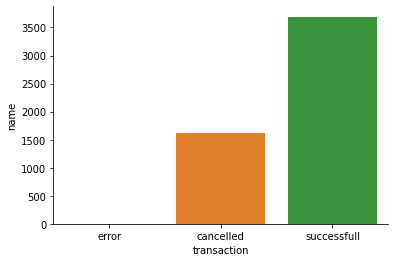

In [30]:
sns.barplot(data = df_for_plot, x = 'transaction', y='name')
sns.despine()

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.


In [31]:
suc_trans = transaction_data.query("transaction == 'successfull'") \
    .groupby(['name'], as_index = False) \
    .agg({'transaction':'count'})
suc_trans.head(5)

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [32]:
suc_trans.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


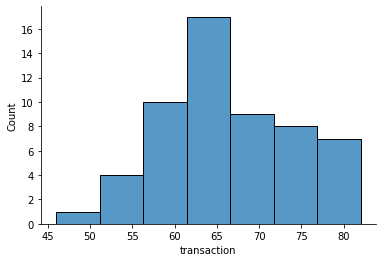

In [33]:
sns.histplot(data = suc_trans, x ='transaction')
sns.despine()

In [34]:
transaction_data_updated = pd.read_csv("C://123/usr/Karpov/Data_Analytics/5/Задания/Минипроект/transaction_data_updated.csv")
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [35]:
transaction_data_updated.isna().sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

In [36]:
transaction_data_updated.describe()

,minute
count,5315.000000
mean,24.622389
std,16.649462
min,0.000000
25%,11.000000
50%,22.000000
75%,37.000000
max,59.000000


Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [37]:
user_vs_minute_pivot = transaction_data_updated \
                        .groupby(['name', 'minute'], as_index = False) \
                        .agg({"transaction":'count'})
                        #.pivot(index = 'name',
                        #       columns = 'minute',
                        #       values = 'transaction')
user_vs_minute_pivot

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [38]:
user_vs_minute_pivot = transaction_data_updated \
                        .groupby(['name', 'minute'], as_index = False) \
                        .agg({"transaction":'count'}) \
                        .pivot(index = 'minute',
                               columns = 'name',
                               values = 'transaction').fillna(0)
user_vs_minute_pivot.head(5)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [39]:
user_vs_minute_pivot2 = transaction_data_updated.pivot_table(index = 'minute',
                               columns = 'name',
                               values = 'transaction',
                               aggfunc = 'count',
                                fill_value = 0)
user_vs_minute_pivot2.head()
# ещё один способ создать pivot table
# для агрегации укажим функцию, которая применится к значениям!!!

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1


In [40]:
user_vs_minute_pivot2 == user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [41]:
user_vs_minute_pivot2.equals(user_vs_minute_pivot)  # функция, чтобы проверить равны ли df, они не равны из-за float

False

In [42]:
user_vs_minute_pivot2 = transaction_data_updated.pivot_table(index = 'minute',
                               columns = 'name',
                               values = 'transaction',
                               aggfunc = 'count').fillna(0)

In [43]:
user_vs_minute_pivot2.equals(user_vs_minute_pivot)

True

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [44]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [45]:
# посчитаем число тразакций в секунду
user_vs_minute_pivot.sum(axis = 1)

minute
0     111.0
1     145.0
2     123.0
3     129.0
4      92.0
5      99.0
6     110.0
7     111.0
8     111.0
9     113.0
10    118.0
11    111.0
12    140.0
13    120.0
14    150.0
15    121.0
16    115.0
17    117.0
18    115.0
19    111.0
20    115.0
21    116.0
22    113.0
23    113.0
24    128.0
25    126.0
26    103.0
27    132.0
28    125.0
29     68.0
30     57.0
31     67.0
32     70.0
33     66.0
34     50.0
35     59.0
36     63.0
37     71.0
38     58.0
39     59.0
40     55.0
41     53.0
42     69.0
43     70.0
44     46.0
45     58.0
46     68.0
47     49.0
48     65.0
49     49.0
50     54.0
51     70.0
52     66.0
53     63.0
54     72.0
55     56.0
56     50.0
57     53.0
58     55.0
59     73.0
dtype: float64

<AxesSubplot:xlabel='minute'>

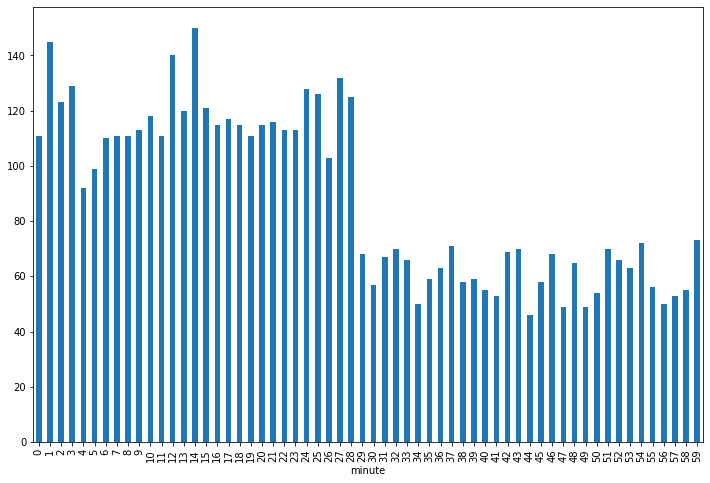

In [46]:
plt.figure(figsize = (12,8))
user_vs_minute_pivot.sum(axis = 1).plot.bar()

Видим, что в первую половину часа, до 30 минуты, то у нас транзакций в 2 раза больше, с чем это связано???

In [47]:
transaction_data_updated # видно, что у нас для 2 наблюдения прошло 01:06:14, а мы записали 6 минут, это неверно,менять!!

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [48]:
transaction_data_updated.date.min()

'2020-03-02 00:00:00'

In [49]:
transaction_data_updated.date.max()   # у нас максимум 01:29, то есть 89 минут

'2020-03-02 01:29:05'

In [50]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [51]:
transaction_data_updated.date.dt.minute

0       37
1       59
2        6
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    15
Name: date, Length: 5315, dtype: int64

In [52]:
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute+transaction_data_updated.date.dt.hour*60
transaction_data_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


<AxesSubplot:>

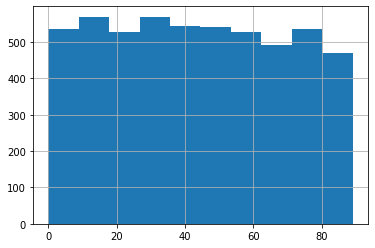

In [56]:
transaction_data_updated.true_minute.hist()

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

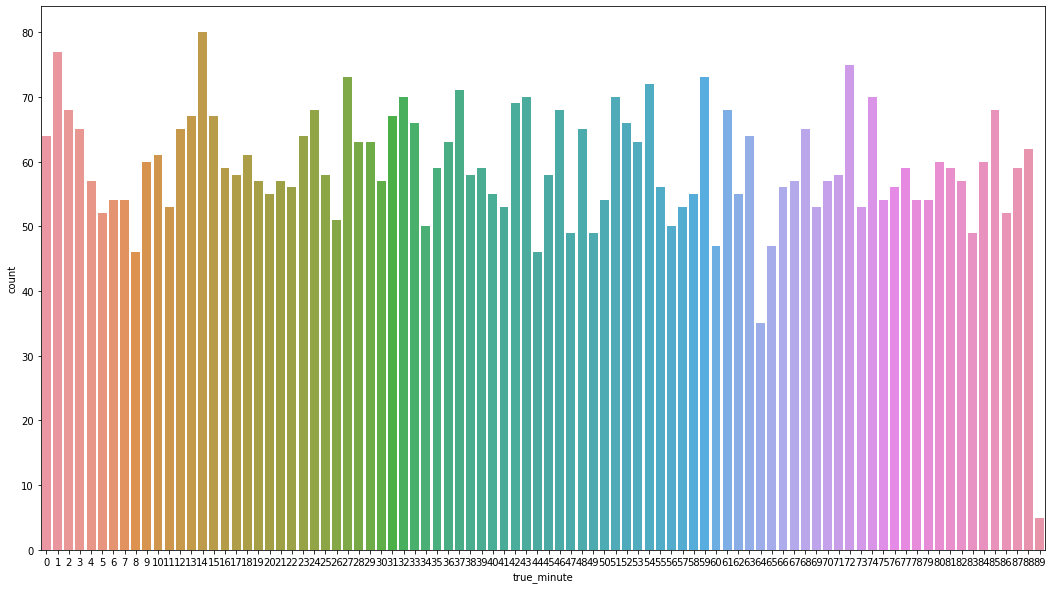

In [62]:
plt.figure(figsize=(18,10))
sns.countplot(transaction_data_updated.true_minute)